In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [209]:
wrf = pd.read_pickle('../pickles/lh_wrf_A')
aws = pd.read_pickle('../pickles/lh_ema')

## Cargamos la info en un dataframe

In [210]:
dfTmp_A = pd.DataFrame()

for index, Temp in wrf.iterrows():
    try:
        a = aws.loc[index]
    except KeyError as error:
        print(f"Index Error: {error}")
        continue

        
    dfTmp_A = dfTmp_A.append({'date': index,
                          'WRF': float(Temp[0]),
                          'AWS': float(a['Temp'])},
                          ignore_index=True)

Index Error: Timestamp('2019-12-10 16:00:00')
Index Error: Timestamp('2020-03-17 05:00:00')
Index Error: Timestamp('2020-03-17 06:00:00')
Index Error: Timestamp('2020-03-17 07:00:00')
Index Error: Timestamp('2020-03-17 08:00:00')
Index Error: Timestamp('2020-03-17 09:00:00')
Index Error: Timestamp('2020-03-17 10:00:00')
Index Error: Timestamp('2020-03-17 11:00:00')
Index Error: Timestamp('2020-03-17 13:00:00')
Index Error: Timestamp('2020-03-17 14:00:00')
Index Error: Timestamp('2020-03-17 15:00:00')
Index Error: Timestamp('2020-03-17 16:00:00')
Index Error: Timestamp('2020-03-17 17:00:00')
Index Error: Timestamp('2020-03-17 18:00:00')
Index Error: Timestamp('2020-03-17 19:00:00')
Index Error: Timestamp('2020-03-17 20:00:00')
Index Error: Timestamp('2020-03-17 21:00:00')
Index Error: Timestamp('2020-03-17 22:00:00')
Index Error: Timestamp('2020-03-17 23:00:00')
Index Error: Timestamp('2020-03-18 00:00:00')
Index Error: Timestamp('2020-03-18 01:00:00')
Index Error: Timestamp('2020-03-18

Index Error: Timestamp('2020-07-08 10:00:00')
Index Error: Timestamp('2020-07-31 00:00:00')
Index Error: Timestamp('2020-07-31 01:00:00')
Index Error: Timestamp('2020-07-31 02:00:00')
Index Error: Timestamp('2020-07-31 03:00:00')
Index Error: Timestamp('2020-07-31 04:00:00')
Index Error: Timestamp('2020-07-31 05:00:00')
Index Error: Timestamp('2020-07-31 06:00:00')
Index Error: Timestamp('2020-07-31 07:00:00')
Index Error: Timestamp('2020-07-31 08:00:00')
Index Error: Timestamp('2020-07-31 09:00:00')
Index Error: Timestamp('2020-07-31 10:00:00')
Index Error: Timestamp('2020-07-31 11:00:00')
Index Error: Timestamp('2020-07-31 12:00:00')
Index Error: Timestamp('2020-07-31 13:00:00')
Index Error: Timestamp('2020-07-31 14:00:00')
Index Error: Timestamp('2020-07-31 15:00:00')
Index Error: Timestamp('2020-07-31 16:00:00')
Index Error: Timestamp('2020-07-31 17:00:00')
Index Error: Timestamp('2020-07-31 18:00:00')
Index Error: Timestamp('2020-07-31 19:00:00')
Index Error: Timestamp('2020-07-31

In [56]:
dfTmp

,AWS,WRF,date
0,10.680000,9.500000,2019-06-01 03:00:00
1,10.670000,10.020000,2019-06-01 04:00:00
2,10.680000,9.710000,2019-06-01 05:00:00
3,10.620000,9.550000,2019-06-01 06:00:00
4,10.410000,9.420000,2019-06-01 07:00:00
...,...,...,...
9132,13.411977,13.743195,2020-07-30 19:00:00
9133,11.729948,11.424591,2020-07-30 20:00:00
9134,10.370223,10.464355,2020-07-30 21:00:00
9135,9.504029,10.351013,2020-07-30 22:00:00


## Generamos algunas variables

### Parametrzacion A

In [293]:
error = dfTmp['WRF'] - dfTmp['AWS']

In [294]:
error

0       1.160000
1      -1.410000
2      -1.550000
3      -2.300000
4      -1.140000
          ...   
9505    0.331218
9506   -0.305356
9507    0.094132
9508    0.846984
9509    0.382702
Length: 9510, dtype: float64

In [295]:
rms_A = np.sqrt(np.mean(error**2))
print(rms_A)

3.965408002114823


#### Media del eror por hora

In [296]:
dfError_A = pd.DataFrame({'date': dfTmp['date'], 'WRF_A':error})

In [297]:
data = dfError_A.groupby([dfError_A["date"].dt.hour]).mean()

<AxesSubplot:xlabel='date'>

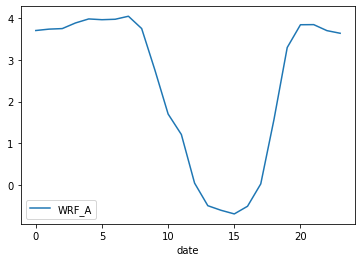

In [219]:
ax = plt.gca()

data.plot(kind='line', ax=ax)

### Agregamos la demás parametrizaciones

In [217]:
wrf_B = pd.read_pickle('../pickles/lh_wrf_B')

In [218]:
dfTmp_B = pd.DataFrame()

for index, Temp in wrf_B.iterrows():
    try:
        a = aws.loc[index]
    except KeyError as error:
        print(f"Index Error: {error}")
        continue

        
    dfTmp_B = dfTmp_B.append({'date': index,
                          'WRF_B': float(Temp[0]),
                          'AWS': float(a['Temp'])},
                          ignore_index=True)

Index Error: Timestamp('2019-12-10 16:00:00')
Index Error: Timestamp('2020-03-17 05:00:00')
Index Error: Timestamp('2020-03-17 06:00:00')
Index Error: Timestamp('2020-03-17 07:00:00')
Index Error: Timestamp('2020-03-17 08:00:00')
Index Error: Timestamp('2020-03-17 09:00:00')
Index Error: Timestamp('2020-03-17 10:00:00')
Index Error: Timestamp('2020-03-17 11:00:00')
Index Error: Timestamp('2020-03-17 13:00:00')
Index Error: Timestamp('2020-03-17 14:00:00')
Index Error: Timestamp('2020-03-17 15:00:00')
Index Error: Timestamp('2020-03-17 16:00:00')
Index Error: Timestamp('2020-03-17 17:00:00')
Index Error: Timestamp('2020-03-17 18:00:00')
Index Error: Timestamp('2020-03-17 19:00:00')
Index Error: Timestamp('2020-03-17 20:00:00')
Index Error: Timestamp('2020-03-17 21:00:00')
Index Error: Timestamp('2020-03-17 22:00:00')
Index Error: Timestamp('2020-03-17 23:00:00')
Index Error: Timestamp('2020-03-18 00:00:00')
Index Error: Timestamp('2020-03-18 01:00:00')
Index Error: Timestamp('2020-03-18

Index Error: Timestamp('2020-07-08 10:00:00')
Index Error: Timestamp('2020-07-31 00:00:00')
Index Error: Timestamp('2020-07-31 01:00:00')
Index Error: Timestamp('2020-07-31 02:00:00')
Index Error: Timestamp('2020-07-31 03:00:00')
Index Error: Timestamp('2020-07-31 04:00:00')
Index Error: Timestamp('2020-07-31 05:00:00')
Index Error: Timestamp('2020-07-31 06:00:00')
Index Error: Timestamp('2020-07-31 07:00:00')
Index Error: Timestamp('2020-07-31 08:00:00')
Index Error: Timestamp('2020-07-31 09:00:00')
Index Error: Timestamp('2020-07-31 10:00:00')
Index Error: Timestamp('2020-07-31 11:00:00')
Index Error: Timestamp('2020-07-31 12:00:00')
Index Error: Timestamp('2020-07-31 13:00:00')
Index Error: Timestamp('2020-07-31 14:00:00')
Index Error: Timestamp('2020-07-31 15:00:00')
Index Error: Timestamp('2020-07-31 16:00:00')
Index Error: Timestamp('2020-07-31 17:00:00')
Index Error: Timestamp('2020-07-31 18:00:00')
Index Error: Timestamp('2020-07-31 19:00:00')
Index Error: Timestamp('2020-07-31

In [298]:
error_B = dfTmp_B['WRF_B'] - dfTmp_B['AWS']

In [299]:
rms_B = np.sqrt(np.mean(error_B**2))
print(rms_B)

3.8697791424657564


In [300]:
dfError_B = pd.DataFrame({'date': dfTmp_B['date'], 'WRF_B':error_B})

In [301]:
data_B = dfError_B.groupby([dfError_B["date"].dt.hour]).mean()

<AxesSubplot:xlabel='date'>

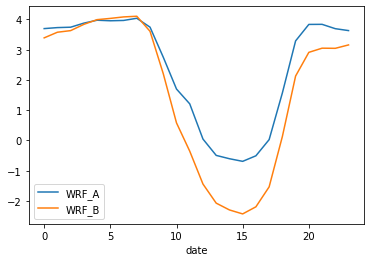

In [224]:
ax = plt.gca()

data.plot(kind='line', ax=ax)
data_B.plot(kind='line', ax=ax)

#### Parametrización C

In [225]:
wrf_C = pd.read_pickle('../pickles/lh_wrf_c')

In [226]:
dfTmp_C = pd.DataFrame()

for index, Temp in wrf_C.iterrows():
    try:
        a = aws.loc[index]
    except KeyError as error:
        print(f"Index Error: {error}")
        continue

        
    dfTmp_C = dfTmp_C.append({'date': index,
                          'WRF_C': float(Temp[0]),
                          'AWS': float(a['Temp'])},
                          ignore_index=True)

Index Error: Timestamp('2019-05-31 12:00:00')
Index Error: Timestamp('2019-05-31 13:00:00')
Index Error: Timestamp('2019-05-31 14:00:00')
Index Error: Timestamp('2019-05-31 15:00:00')
Index Error: Timestamp('2019-05-31 16:00:00')
Index Error: Timestamp('2019-05-31 17:00:00')
Index Error: Timestamp('2019-05-31 18:00:00')
Index Error: Timestamp('2019-05-31 19:00:00')
Index Error: Timestamp('2019-05-31 20:00:00')
Index Error: Timestamp('2019-05-31 21:00:00')
Index Error: Timestamp('2019-05-31 22:00:00')
Index Error: Timestamp('2019-05-31 23:00:00')
Index Error: Timestamp('2019-12-10 16:00:00')
Index Error: Timestamp('2020-03-17 05:00:00')
Index Error: Timestamp('2020-03-17 06:00:00')
Index Error: Timestamp('2020-03-17 07:00:00')
Index Error: Timestamp('2020-03-17 08:00:00')
Index Error: Timestamp('2020-03-17 09:00:00')
Index Error: Timestamp('2020-03-17 10:00:00')
Index Error: Timestamp('2020-03-17 11:00:00')
Index Error: Timestamp('2020-03-17 13:00:00')
Index Error: Timestamp('2020-03-17

Index Error: Timestamp('2020-07-08 10:00:00')
Index Error: Timestamp('2020-07-31 00:00:00')
Index Error: Timestamp('2020-07-31 01:00:00')
Index Error: Timestamp('2020-07-31 02:00:00')
Index Error: Timestamp('2020-07-31 03:00:00')
Index Error: Timestamp('2020-07-31 04:00:00')
Index Error: Timestamp('2020-07-31 05:00:00')
Index Error: Timestamp('2020-07-31 06:00:00')
Index Error: Timestamp('2020-07-31 07:00:00')
Index Error: Timestamp('2020-07-31 08:00:00')
Index Error: Timestamp('2020-07-31 09:00:00')
Index Error: Timestamp('2020-07-31 10:00:00')
Index Error: Timestamp('2020-07-31 11:00:00')
Index Error: Timestamp('2020-07-31 12:00:00')
Index Error: Timestamp('2020-07-31 13:00:00')
Index Error: Timestamp('2020-07-31 14:00:00')
Index Error: Timestamp('2020-07-31 15:00:00')
Index Error: Timestamp('2020-07-31 16:00:00')
Index Error: Timestamp('2020-07-31 17:00:00')
Index Error: Timestamp('2020-07-31 18:00:00')
Index Error: Timestamp('2020-07-31 19:00:00')
Index Error: Timestamp('2020-07-31

In [302]:
error_C = dfTmp_C['WRF_C'] - dfTmp_C['AWS']

In [303]:
rms_C = np.sqrt(np.mean(error_C**2))
print(rms_C)

4.047698485701247


In [304]:
dfError_C = pd.DataFrame({'date': dfTmp_C['date'], 'WRF_C':error_C})

In [305]:
data_C = dfError_C.groupby([dfError_C["date"].dt.hour]).mean()

Text(0, 0.5, 'Error (WRF - AWS)')

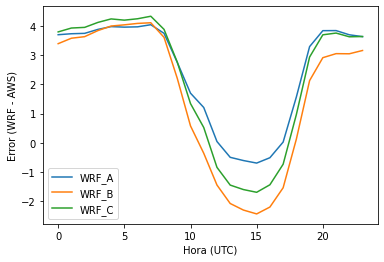

In [231]:
ax = plt.gca()

data.plot(kind='line', ax=ax)
data_B.plot(kind='line', ax=ax)
data_C.plot(kind='line', ax=ax)

plt.xlabel('Hora (UTC)')
plt.ylabel('Error (WRF - AWS)')

#### Parametrizacion D

In [320]:
wrf_D = pd.read_pickle('../pickles/lh_wrf_D')

In [321]:
dfTmp_D = pd.DataFrame()

for index, Temp in wrf_D.iterrows():
    try:
        a = aws.loc[index]
    except KeyError as error:
        print(f"Index Error: {error}")
        continue

        
    dfTmp_D = dfTmp_D.append({'date': index,
                          'WRF_D': float(Temp[0]),
                          'AWS': float(a['Temp'])},
                          ignore_index=True)

Index Error: Timestamp('2019-05-30 12:00:00')
Index Error: Timestamp('2019-05-30 13:00:00')
Index Error: Timestamp('2019-05-30 14:00:00')
Index Error: Timestamp('2019-05-30 15:00:00')
Index Error: Timestamp('2019-05-30 16:00:00')
Index Error: Timestamp('2019-05-30 17:00:00')
Index Error: Timestamp('2019-05-30 18:00:00')
Index Error: Timestamp('2019-05-30 19:00:00')
Index Error: Timestamp('2019-05-30 20:00:00')
Index Error: Timestamp('2019-05-30 21:00:00')
Index Error: Timestamp('2019-05-30 22:00:00')
Index Error: Timestamp('2019-05-30 23:00:00')
Index Error: Timestamp('2019-05-31 00:00:00')
Index Error: Timestamp('2019-05-31 01:00:00')
Index Error: Timestamp('2019-05-31 02:00:00')
Index Error: Timestamp('2019-05-31 03:00:00')
Index Error: Timestamp('2019-05-31 04:00:00')
Index Error: Timestamp('2019-05-31 05:00:00')
Index Error: Timestamp('2019-05-31 06:00:00')
Index Error: Timestamp('2019-05-31 07:00:00')
Index Error: Timestamp('2019-05-31 08:00:00')
Index Error: Timestamp('2019-05-31

Index Error: Timestamp('2020-07-31 00:00:00')
Index Error: Timestamp('2020-07-31 01:00:00')
Index Error: Timestamp('2020-07-31 02:00:00')
Index Error: Timestamp('2020-07-31 03:00:00')
Index Error: Timestamp('2020-07-31 04:00:00')
Index Error: Timestamp('2020-07-31 05:00:00')
Index Error: Timestamp('2020-07-31 06:00:00')
Index Error: Timestamp('2020-07-31 07:00:00')
Index Error: Timestamp('2020-07-31 08:00:00')
Index Error: Timestamp('2020-07-31 09:00:00')
Index Error: Timestamp('2020-07-31 10:00:00')
Index Error: Timestamp('2020-07-31 11:00:00')
Index Error: Timestamp('2020-07-31 12:00:00')
Index Error: Timestamp('2020-07-31 13:00:00')
Index Error: Timestamp('2020-07-31 14:00:00')
Index Error: Timestamp('2020-07-31 15:00:00')
Index Error: Timestamp('2020-07-31 16:00:00')
Index Error: Timestamp('2020-07-31 17:00:00')
Index Error: Timestamp('2020-07-31 18:00:00')
Index Error: Timestamp('2020-07-31 19:00:00')
Index Error: Timestamp('2020-07-31 20:00:00')
Index Error: Timestamp('2020-07-31

In [234]:
dfTmp_D

,AWS,WRF_D,date
0,17.110000,14.990000,2019-06-02 12:00:00
1,19.210000,16.350000,2019-06-02 13:00:00
2,19.530000,17.280000,2019-06-02 14:00:00
3,19.070000,17.670000,2019-06-02 15:00:00
4,21.430000,17.910000,2019-06-02 16:00:00
...,...,...,...
8804,13.411977,12.637238,2020-07-30 19:00:00
8805,11.729948,10.783905,2020-07-30 20:00:00
8806,10.370223,9.718597,2020-07-30 21:00:00
8807,9.504029,9.885468,2020-07-30 22:00:00


In [312]:
error_D = dfTmp_D['WRF_D'] - dfTmp_C['AWS']

rms_D = np.sqrt(np.mean(error_D**2))
print(rms_D)

dfError_D = pd.DataFrame({'date': dfTmp_D['date'], 'WRF_D':error_D})

data_D = dfError_D.groupby([dfError_D["date"].dt.hour]).mean()

8.304998792276468


Text(0.5, 1.0, 'Grafico de errores entre WRF y Laboratorio de Hidraulica')

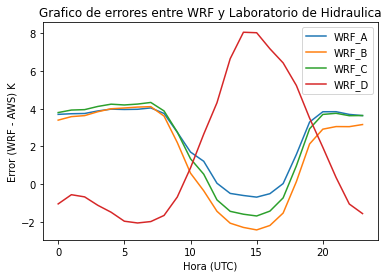

In [236]:
ax = plt.gca()

data.plot(kind='line', ax=ax, legend='WRF A')
data_B.plot(kind='line', ax=ax, legend='WRF B')
data_C.plot(kind='line', ax=ax, legend='WRF C')
data_D.plot(kind='line', ax=ax, legend='WRF D')

plt.xlabel('Hora (UTC)')
plt.ylabel('Error (WRF - AWS) K')
plt.title('Grafico de errores entre WRF y Laboratorio de Hidraulica')

In [159]:
#TODO  tabla RMS y demás 

In [307]:
mae_A = np.sum(np.absolute(error))/error.size
mae_B = np.sum(np.absolute(error_B))/error_B.size
mae_C = np.sum(np.absolute(error_C))/error_C.size
mae_D = np.sum(np.absolute(error_D))/error_D.size



## ¿Qué sucede en los 6 mese de calor? ¿y en los 6 de invierno?

### De Octubre a Marzo

In [237]:
start_date = '2019-10-01 00:00:00'
end_date = '2020-03-30 23:00:00'

In [290]:
mask_A = (dfTmp_A['date'] > start_date) & (dfTmp_A['date'] <= end_date)
mask_B = (dfTmp_B['date'] > start_date) & (dfTmp_B['date'] <= end_date)
mask_C = (dfTmp_C['date'] > start_date) & (dfTmp_C['date'] <= end_date)
mask_D = (dfTmp_D['date'] > start_date) & (dfTmp_D['date'] <= end_date)
Atmp = dfTmp_A.loc[mask_A]
Btmp = dfTmp_B.loc[mask_B]
Ctmp = dfTmp_C.loc[mask_C]
Dtmp = dfTmp_D.loc[mask_D]

In [282]:
mae_A_summer = np.sum(np.absolute(error_A_summer))
error_A_summer.size

1

In [291]:
error_A_summer = Atmp['WRF'] - Atmp['AWS']
error_B_summer = Btmp['WRF_B'] - Btmp['AWS']
error_C_summer = Ctmp['WRF_C'] - Ctmp['AWS']
error_D_summer = Dtmp['WRF_D'] - Dtmp['AWS']

rmse_A_summer = np.sqrt(np.mean(error_A_summer**2))
rmse_B_summer = np.sqrt(np.mean(error_B_summer**2))
rmse_C_summer = np.sqrt(np.mean(error_C_summer**2))
rmse_D_summer = np.sqrt(np.mean(error_D_summer**2))


mae_A_summer = np.sum(np.absolute(error_A_summer))/error_A_summer.size
mae_B_summer = np.sum(np.absolute(error_B_summer))/error_B_summer.size
mae_C_summer = np.sum(np.absolute(error_C_summer))/error_C_summer.size
mae_D_summer = np.sum(np.absolute(error_D_summer))/error_D_summer.size

print(rmse_A_summer)
print(rmse_B_summer)
print(rmse_C_summer)
print(rmse_D_summer)

dfError_A_summer = pd.DataFrame({'date': Atmp['date'], 'WRF_A':error_A_summer})
dfError_B_summer = pd.DataFrame({'date': Btmp['date'], 'WRF_B':error_B_summer})
dfError_C_summer = pd.DataFrame({'date': Ctmp['date'], 'WRF_C':error_C_summer})
dfError_D_summer = pd.DataFrame({'date': Dtmp['date'], 'WRF_D':error_D_summer})

data_A_summer = dfError_A_summer.groupby([dfError_A_summer["date"].dt.hour]).mean()
data_B_summer = dfError_B_summer.groupby([dfError_B_summer["date"].dt.hour]).mean()
data_C_summer = dfError_C_summer.groupby([dfError_C_summer["date"].dt.hour]).mean()
data_D_summer = dfError_D_summer.groupby([dfError_D_summer["date"].dt.hour]).mean()

4.095608656633674
3.7104607999838213
3.9866752222589645
3.588165192662984


Text(0.5, 1.0, 'Grafico de errores de temperatura entre 01/10/19 y 31/03/20')

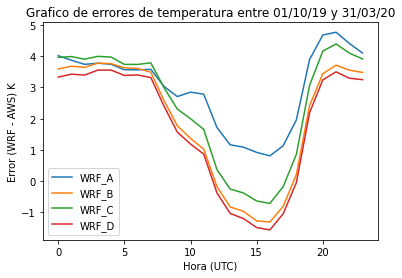

In [240]:
ax = plt.gca()

data_A_summer.plot(kind='line', ax=ax)
data_B_summer.plot(kind='line', ax=ax)
data_C_summer.plot(kind='line', ax=ax)
data_D_summer.plot(kind='line', ax=ax)

plt.xlabel('Hora (UTC)')
plt.ylabel('Error (WRF - AWS) K')
plt.title('Grafico de errores de temperatura entre 01/10/19 y 31/03/20')

### De Abril a Noviembre

In [197]:
start_date_2019 = '2019-06-01 00:00:00'
end_date_2019 = '2019-09-30 23:00:00'
start_date_2020 = '2020-04-01 00:00:00'
end_date_2020 = '2020-07-31 23:00:00'

In [286]:
mask_A = (dfTmp_A['date'] > start_date_2019) & (dfTmp_A['date'] <= end_date_2019) | (dfTmp_A['date'] > start_date_2020) & (dfTmp_A['date'] <= end_date_2020)
mask_B = (dfTmp_B['date'] > start_date_2019) & (dfTmp_B['date'] <= end_date_2019) | (dfTmp_B['date'] > start_date_2020) & (dfTmp_B['date'] <= end_date_2020)
mask_C = (dfTmp_C['date'] > start_date_2019) & (dfTmp_C['date'] <= end_date_2019) | (dfTmp_C['date'] > start_date_2020) & (dfTmp_C['date'] <= end_date_2020)
mask_D = (dfTmp_D['date'] > start_date_2019) & (dfTmp_D['date'] <= end_date_2019) | (dfTmp_D['date'] > start_date_2020) & (dfTmp_D['date'] <= end_date_2020)
Atmp = dfTmp_A.loc[mask_A]
Btmp = dfTmp_B.loc[mask_B]
Ctmp = dfTmp_C.loc[mask_C]
Dtmp = dfTmp_D.loc[mask_D]

In [244]:
error_D_winter.size

4763

In [287]:
error_A_winter = Atmp['WRF'] - Atmp['AWS']
error_B_winter = Btmp['WRF_B'] - Btmp['AWS']
error_C_winter = Ctmp['WRF_C'] - Ctmp['AWS']
error_D_winter = Dtmp['WRF_D'] - Dtmp['AWS']

rmse_A_winter = np.sqrt(np.mean(error_A_winter**2))
rmse_B_winter = np.sqrt(np.mean(error_B_winter**2))
rmse_C_winter = np.sqrt(np.mean(error_C_winter**2))
rmse_D_winter = np.sqrt(np.mean(error_D_winter**2))

mae_A_winter = np.sum(np.absolute(error_A_winter))/error_A_winter.size
mae_B_winter = np.sum(np.absolute(error_B_winter))/error_B_winter.size
mae_C_winter = np.sum(np.absolute(error_C_winter))/error_C_winter.size
mae_D_winter = np.sum(np.absolute(error_D_winter))/error_D_winter.size

print(rmse_A_winter)
print(rmse_B_winter)
print(rmse_C_winter)
print(rmse_D_winter)

dfError_A_winter = pd.DataFrame({'date': Atmp['date'], 'WRF_A':error_A_winter})
dfError_B_winter = pd.DataFrame({'date': Btmp['date'], 'WRF_B':error_B_winter})
dfError_C_winter = pd.DataFrame({'date': Ctmp['date'], 'WRF_C':error_C_winter})
dfError_D_winter = pd.DataFrame({'date': Dtmp['date'], 'WRF_D':error_D_winter})

data_A_winter = dfError_A_winter.groupby([dfError_A_winter["date"].dt.hour]).mean()
data_B_winter = dfError_B_winter.groupby([dfError_B_winter["date"].dt.hour]).mean()
data_C_winter = dfError_C_winter.groupby([dfError_C_winter["date"].dt.hour]).mean()
data_D_winter = dfError_D_winter.groupby([dfError_D_winter["date"].dt.hour]).mean()

3.86559736703386
4.004226831523964
4.105503871297619
3.8982302164564238


Text(0.5, 1.0, 'Grafico de errores de temperatura entre 01/06/19-31/19/19 y 01/04/20-31-07-20')

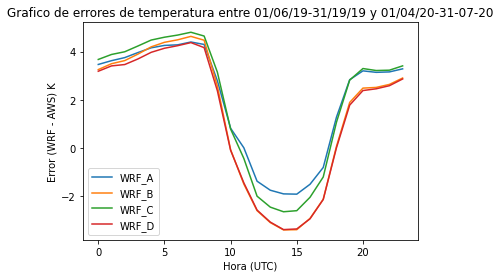

In [241]:
ax = plt.gca()

data_A_winter.plot(kind='line', ax=ax)
data_B_winter.plot(kind='line', ax=ax)
data_C_winter.plot(kind='line', ax=ax)
data_D_winter.plot(kind='line', ax=ax)

plt.xlabel('Hora (UTC)')
plt.ylabel('Error (WRF - AWS) K')
plt.title('Grafico de errores de temperatura entre 01/06/19-31/19/19 y 01/04/20-31-07-20')

### Resumendio en indices

In [308]:
dfIndices = pd.DataFrame({
    'wrf':['WRF_A', 'WRF_B', 'WRF_C', 'WRF_D'],
    'RMS anual': [rms_A, rms_B, rms_C, rms_D],
    'RMS verano': [rmse_A_summer, rmse_B_summer, rmse_C_summer, rmse_D_summer],
    'RMS invierno': [rmse_A_winter, rmse_B_winter, rmse_C_winter, rmse_D_winter],
    'MAE': [mae_A, mae_B, mae_C, mae_D],
    'MAE verano': [mae_A_summer, mae_B_summer, mae_C_summer, mae_D_summer],
    'MAE invierno': [mae_A_winter, mae_B_winter, mae_C_winter, mae_D_winter]
})

In [309]:
dfIndices

,wrf,RMS anual,RMS verano,RMS invierno,MAE,MAE verano,MAE invierno
0,WRF_A,3.965408,4.095609,3.865597,3.236468,3.399725,3.112794
1,WRF_B,3.869779,3.710461,4.004227,3.130714,3.020141,3.228676
2,WRF_C,4.047698,3.986675,4.105504,3.338295,3.307747,3.368886
3,WRF_D,8.304999,3.588165,3.898230,6.538498,2.893090,3.145097


### Si agregamos mas estaciones

#### 60 cuadras

In [317]:
# definitions
base = '/home/sagus/Development/datasets/'
filename = 'omixom_60Cuadras.csv'

try:
    csv_data = pd.read_csv(f"{base}{filename}")
except IOError:
    print("Error: File does not appear to exist.")

dfData = pd.DataFrame(dtype=float)
dfData['date'] = pd.to_datetime(csv_data['Fecha'],format='%d-%m-%Y %H:%M')
# dfData['ppn'] = csv_data['Registro de Lluvia [mm]']
dfData['Temp'] = csv_data['Temperatura [°C]']

dfData['Temp'] = dfData['Temp'].astype(float)

aws_60 = dfData.set_index('date')
wrf_60_A = pd.read_pickle('../pickles/60cuadras_wrf_A')
wrf_60_B = pd.read_pickle('../pickles/60cuadras_wrf_B')
wrf_60_C = pd.read_pickle('../pickles/60cuadras_wrf_C')
wrf_60_D = pd.read_pickle('../pickles/60cuadras_wrf_D')

In [322]:
dfTmp_60_A = pd.DataFrame()

for index, Temp in dfTmp_60_A.iterrows():
    try:
        a = aws.loc[index]
    except KeyError as error:
        print(f"Index Error: {error}")
        continue

        
    dfTmp_60_A = dfTmp_60_A.append({'date': index,
                          'WRF_60_A': float(Temp[0]),
                          'AWS': float(a['Temp'])},
                          ignore_index=True)

In [323]:
dfTmp_60_B = pd.DataFrame()

for index, Temp in wrf_60_A.iterrows():
    try:
        a = aws.loc[index]
    except KeyError as error:
        print(f"Index Error: {error}")
        continue

        
    dfTmp_60_B = dfTmp_60_B.append({'date': index,
                          'WRF_60_B': float(Temp[0]),
                          'AWS': float(a['Temp'])},
                          ignore_index=True)

Index Error: Timestamp('2019-12-10 16:00:00')
Index Error: Timestamp('2020-03-17 05:00:00')
Index Error: Timestamp('2020-03-17 06:00:00')
Index Error: Timestamp('2020-03-17 07:00:00')
Index Error: Timestamp('2020-03-17 08:00:00')
Index Error: Timestamp('2020-03-17 09:00:00')
Index Error: Timestamp('2020-03-17 10:00:00')
Index Error: Timestamp('2020-03-17 11:00:00')
Index Error: Timestamp('2020-03-17 13:00:00')
Index Error: Timestamp('2020-03-17 14:00:00')
Index Error: Timestamp('2020-03-17 15:00:00')
Index Error: Timestamp('2020-03-17 16:00:00')
Index Error: Timestamp('2020-03-17 17:00:00')
Index Error: Timestamp('2020-03-17 18:00:00')
Index Error: Timestamp('2020-03-17 19:00:00')
Index Error: Timestamp('2020-03-17 20:00:00')
Index Error: Timestamp('2020-03-17 21:00:00')
Index Error: Timestamp('2020-03-17 22:00:00')
Index Error: Timestamp('2020-03-17 23:00:00')
Index Error: Timestamp('2020-03-18 00:00:00')
Index Error: Timestamp('2020-03-18 01:00:00')
Index Error: Timestamp('2020-03-18

Index Error: Timestamp('2020-07-08 10:00:00')
Index Error: Timestamp('2020-07-31 00:00:00')
Index Error: Timestamp('2020-07-31 01:00:00')
Index Error: Timestamp('2020-07-31 02:00:00')
Index Error: Timestamp('2020-07-31 03:00:00')
Index Error: Timestamp('2020-07-31 04:00:00')
Index Error: Timestamp('2020-07-31 05:00:00')
Index Error: Timestamp('2020-07-31 06:00:00')
Index Error: Timestamp('2020-07-31 07:00:00')
Index Error: Timestamp('2020-07-31 08:00:00')
Index Error: Timestamp('2020-07-31 09:00:00')
Index Error: Timestamp('2020-07-31 10:00:00')
Index Error: Timestamp('2020-07-31 11:00:00')
Index Error: Timestamp('2020-07-31 12:00:00')
Index Error: Timestamp('2020-07-31 13:00:00')
Index Error: Timestamp('2020-07-31 14:00:00')
Index Error: Timestamp('2020-07-31 15:00:00')
Index Error: Timestamp('2020-07-31 16:00:00')
Index Error: Timestamp('2020-07-31 17:00:00')
Index Error: Timestamp('2020-07-31 18:00:00')
Index Error: Timestamp('2020-07-31 19:00:00')
Index Error: Timestamp('2020-07-31

In [324]:
dfTmp_60_C = pd.DataFrame()

for index, Temp in wrf_60_C.iterrows():
    try:
        a = aws.loc[index]
    except KeyError as error:
        print(f"Index Error: {error}")
        continue

        
    dfTmp_60_C = dfTmp_60_C.append({'date': index,
                          'WRF_60_C': float(Temp[0]),
                          'AWS': float(a['Temp'])},
                          ignore_index=True)

Index Error: Timestamp('2019-05-31 12:00:00')
Index Error: Timestamp('2019-05-31 13:00:00')
Index Error: Timestamp('2019-05-31 14:00:00')
Index Error: Timestamp('2019-05-31 15:00:00')
Index Error: Timestamp('2019-05-31 16:00:00')
Index Error: Timestamp('2019-05-31 17:00:00')
Index Error: Timestamp('2019-05-31 18:00:00')
Index Error: Timestamp('2019-05-31 19:00:00')
Index Error: Timestamp('2019-05-31 20:00:00')
Index Error: Timestamp('2019-05-31 21:00:00')
Index Error: Timestamp('2019-05-31 22:00:00')
Index Error: Timestamp('2019-05-31 23:00:00')
Index Error: Timestamp('2019-12-10 16:00:00')
Index Error: Timestamp('2020-03-17 05:00:00')
Index Error: Timestamp('2020-03-17 06:00:00')
Index Error: Timestamp('2020-03-17 07:00:00')
Index Error: Timestamp('2020-03-17 08:00:00')
Index Error: Timestamp('2020-03-17 09:00:00')
Index Error: Timestamp('2020-03-17 10:00:00')
Index Error: Timestamp('2020-03-17 11:00:00')
Index Error: Timestamp('2020-03-17 13:00:00')
Index Error: Timestamp('2020-03-17

Index Error: Timestamp('2020-07-08 10:00:00')
Index Error: Timestamp('2020-07-31 00:00:00')
Index Error: Timestamp('2020-07-31 01:00:00')
Index Error: Timestamp('2020-07-31 02:00:00')
Index Error: Timestamp('2020-07-31 03:00:00')
Index Error: Timestamp('2020-07-31 04:00:00')
Index Error: Timestamp('2020-07-31 05:00:00')
Index Error: Timestamp('2020-07-31 06:00:00')
Index Error: Timestamp('2020-07-31 07:00:00')
Index Error: Timestamp('2020-07-31 08:00:00')
Index Error: Timestamp('2020-07-31 09:00:00')
Index Error: Timestamp('2020-07-31 10:00:00')
Index Error: Timestamp('2020-07-31 11:00:00')
Index Error: Timestamp('2020-07-31 12:00:00')
Index Error: Timestamp('2020-07-31 13:00:00')
Index Error: Timestamp('2020-07-31 14:00:00')
Index Error: Timestamp('2020-07-31 15:00:00')
Index Error: Timestamp('2020-07-31 16:00:00')
Index Error: Timestamp('2020-07-31 17:00:00')
Index Error: Timestamp('2020-07-31 18:00:00')
Index Error: Timestamp('2020-07-31 19:00:00')
Index Error: Timestamp('2020-07-31

In [325]:
dfTmp_60_D = pd.DataFrame()

for index, Temp in wrf_60_D.iterrows():
    try:
        a = aws.loc[index]
    except KeyError as error:
        print(f"Index Error: {error}")
        continue

        
    dfTmp_60_D = dfTmp_60_D.append({'date': index,
                          'WRF_60_D': float(Temp[0]),
                          'AWS': float(a['Temp'])},
                          ignore_index=True)

Index Error: Timestamp('2019-05-30 12:00:00')
Index Error: Timestamp('2019-05-30 13:00:00')
Index Error: Timestamp('2019-05-30 14:00:00')
Index Error: Timestamp('2019-05-30 15:00:00')
Index Error: Timestamp('2019-05-30 16:00:00')
Index Error: Timestamp('2019-05-30 17:00:00')
Index Error: Timestamp('2019-05-30 18:00:00')
Index Error: Timestamp('2019-05-30 19:00:00')
Index Error: Timestamp('2019-05-30 20:00:00')
Index Error: Timestamp('2019-05-30 21:00:00')
Index Error: Timestamp('2019-05-30 22:00:00')
Index Error: Timestamp('2019-05-30 23:00:00')
Index Error: Timestamp('2019-05-31 00:00:00')
Index Error: Timestamp('2019-05-31 01:00:00')
Index Error: Timestamp('2019-05-31 02:00:00')
Index Error: Timestamp('2019-05-31 03:00:00')
Index Error: Timestamp('2019-05-31 04:00:00')
Index Error: Timestamp('2019-05-31 05:00:00')
Index Error: Timestamp('2019-05-31 06:00:00')
Index Error: Timestamp('2019-05-31 07:00:00')
Index Error: Timestamp('2019-05-31 08:00:00')
Index Error: Timestamp('2019-05-31

Index Error: Timestamp('2020-07-31 00:00:00')
Index Error: Timestamp('2020-07-31 01:00:00')
Index Error: Timestamp('2020-07-31 02:00:00')
Index Error: Timestamp('2020-07-31 03:00:00')
Index Error: Timestamp('2020-07-31 04:00:00')
Index Error: Timestamp('2020-07-31 05:00:00')
Index Error: Timestamp('2020-07-31 06:00:00')
Index Error: Timestamp('2020-07-31 07:00:00')
Index Error: Timestamp('2020-07-31 08:00:00')
Index Error: Timestamp('2020-07-31 09:00:00')
Index Error: Timestamp('2020-07-31 10:00:00')
Index Error: Timestamp('2020-07-31 11:00:00')
Index Error: Timestamp('2020-07-31 12:00:00')
Index Error: Timestamp('2020-07-31 13:00:00')
Index Error: Timestamp('2020-07-31 14:00:00')
Index Error: Timestamp('2020-07-31 15:00:00')
Index Error: Timestamp('2020-07-31 16:00:00')
Index Error: Timestamp('2020-07-31 17:00:00')
Index Error: Timestamp('2020-07-31 18:00:00')
Index Error: Timestamp('2020-07-31 19:00:00')
Index Error: Timestamp('2020-07-31 20:00:00')
Index Error: Timestamp('2020-07-31

In [ ]:
error_60_A = Atmp['WRF'] - Atmp['AWS']
error_60_B = dfTmp_60_B['WRF_B'] - Btmp['AWS']
error_60_C = dfTmp_60_C['WRF_60_C'] - dfTmp_60_C['AWS']
error_60_D = dfTmp_60_D['WRF_60_D'] - dfTmp_60_D['AWS']

rmse_A_winter = np.sqrt(np.mean(error_A_winter**2))
rmse_B_winter = np.sqrt(np.mean(error_B_winter**2))
rmse_C_winter = np.sqrt(np.mean(error_C_winter**2))
rmse_D_winter = np.sqrt(np.mean(error_D_winter**2))

mae_A_winter = np.sum(np.absolute(error_A_winter))/error_A_winter.size
mae_B_winter = np.sum(np.absolute(error_B_winter))/error_B_winter.size
mae_C_winter = np.sum(np.absolute(error_C_winter))/error_C_winter.size
mae_D_winter = np.sum(np.absolute(error_D_winter))/error_D_winter.size

print(rmse_A_winter)
print(rmse_B_winter)
print(rmse_C_winter)
print(rmse_D_winter)

dfError_A_winter = pd.DataFrame({'date': Atmp['date'], 'WRF_A':error_A_winter})
dfError_B_winter = pd.DataFrame({'date': Btmp['date'], 'WRF_B':error_B_winter})
dfError_C_winter = pd.DataFrame({'date': Ctmp['date'], 'WRF_C':error_C_winter})
dfError_D_winter = pd.DataFrame({'date': Dtmp['date'], 'WRF_D':error_D_winter})

data_A_winter = dfError_A_winter.groupby([dfError_A_winter["date"].dt.hour]).mean()
data_B_winter = dfError_B_winter.groupby([dfError_B_winter["date"].dt.hour]).mean()
data_C_winter = dfError_C_winter.groupby([dfError_C_winter["date"].dt.hour]).mean()
data_D_winter = dfError_D_winter.groupby([dfError_D_winter["date"].dt.hour]).mean()